Miguel Ángel Matas Rubio
  
  
Miguel Ángel Roldan Mora 
        
Jesus Santiyán Reviriego

Import Libraries

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

**Training Values**: These are the features you'll use to train a model. There are 38 features, including structual information such as the number of floors (before the earthquake), age of the building, and type of foundation, as well as legal information such as ownership status, building use, and the number of families who live there. Each building is identified by a unique (random) building_id, which you can use as an index.

In [ ]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
df_train_values= pd.read_csv("train_values.csv", index_col = "building_id")
df_train_values.shape

--2023-01-22 15:28:43--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_values.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv [following]
--2023-01-22 15:28:43--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23442727 (22M) [text/plain]
Saving to: ‘train_values.csv’

train_values.csv    100%[===================>]  22.36M  --.-KB/s    in 0.08s   

2023-01-22 15:28:45 (267 MB/s) - ‘train_values.csv’ saved [23442727

(260601, 38)

In [ ]:
df_train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

These are the labels. Every `building_id` in the training values data has a corresponding label in this file. A $1$ represents low damage, a $2$ represents a medium amount of damage, and a $3$ represents almost complete destruction.

In [ ]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
df_train_labels = pd.read_csv("train_labels.csv", index_col = "building_id")
df_train_labels.head()

--2023-01-22 15:28:45--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/train_labels.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv [following]
--2023-01-22 15:28:46--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2330792 (2.2M) [text/plain]
Saving to: ‘train_labels.csv’

train_labels.csv    100%[===================>]   2.22M  --.-KB/s    in 0.02s   

2023-01-22 15:28:46 (103 MB/s) - ‘train_labels.csv’ saved [2330792/

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [ ]:
df_train_values.join(df_train_labels)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


## Exploratory Data Analysis

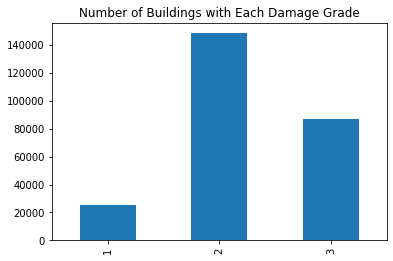

In [ ]:
(df_train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

## Feature Selection/Feature Engineering

**Basics:**

1. select a group of features according to its meaning

In [ ]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

df_train_values_subset = df_train_values[selected_features]
df_train_values_subset.head()

,foundation_type,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,has_superstructure_cement_mortar_stone
building_id,,,,,,
802906,r,6,5,2,t,0
28830,r,8,7,2,o,0
94947,r,5,5,2,t,0
590882,r,6,5,2,t,0
201944,r,8,9,3,t,0


A quick look at the relationships between our numeric features and labels

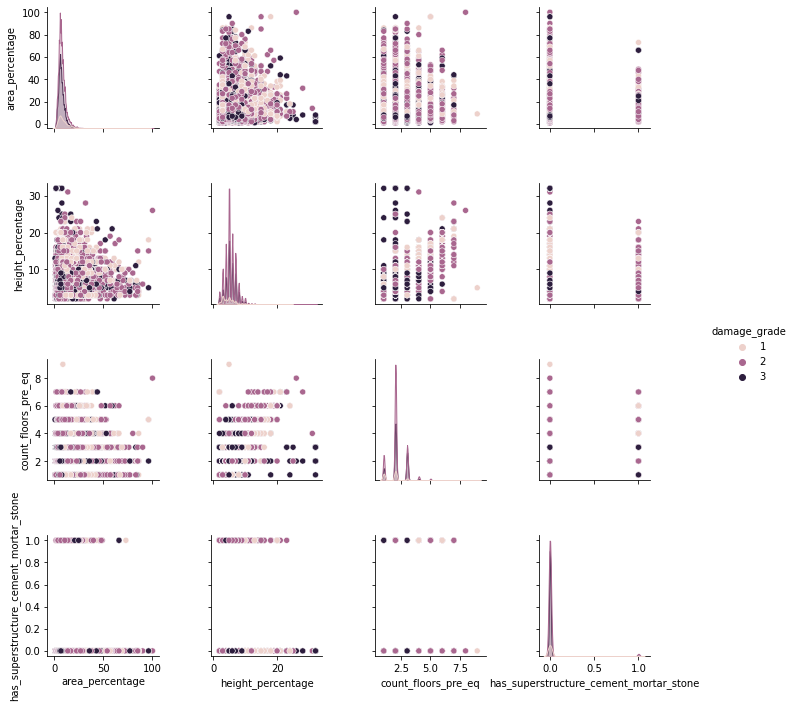

In [ ]:
sns.pairplot(df_train_values_subset.join(df_train_labels), 
             hue='damage_grade')

2. If there are categorical variables in the selected set you have to transform them using OneHotEncoding (get_dummies).

[Link 1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
[Link 2](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-dummies)

In [ ]:
df_train_values_subset = pd.get_dummies(df_train_values_subset)
df_train_values_subset.head()

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
building_id,,,,,,,,,,,,
802906,6,5,2,0,0,0,1,0,0,0,0,1
28830,8,7,2,0,0,0,1,0,0,0,1,0
94947,5,5,2,0,0,0,1,0,0,0,0,1
590882,6,5,2,0,0,0,1,0,0,0,0,1
201944,8,9,3,0,0,0,1,0,0,0,0,1


**Possible Extensions:**
1. Select variables according the base line results
2. Use correlation analysis (from the categorial point of view) to avoid redundancy
3. Transform the geographic variables, group variables, etc.

In [ ]:
neo_selected_features = ['has_superstructure_mud_mortar_stone',
                         'count_floors_pre_eq',
                         'foundation_type',
                         'roof_type',
                         ]
df_train_values_neosubset = df_train_values[neo_selected_features]
df_train_values_neosubset.head()

,has_superstructure_mud_mortar_stone,count_floors_pre_eq,foundation_type,roof_type
building_id,,,,
802906,1,2,r,n
28830,1,2,r,n
94947,1,2,r,n
590882,1,2,r,n
201944,0,3,r,n


In [ ]:
df_train_values_neosubset = pd.get_dummies(df_train_values_neosubset)
df_train_values_neosubset.head()

,has_superstructure_mud_mortar_stone,count_floors_pre_eq,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x
building_id,,,,,,,,,,
802906,1,2,0,0,1,0,0,1,0,0
28830,1,2,0,0,1,0,0,1,0,0
94947,1,2,0,0,1,0,0,1,0,0
590882,1,2,0,0,1,0,0,1,0,0
201944,0,3,0,0,1,0,0,1,0,0


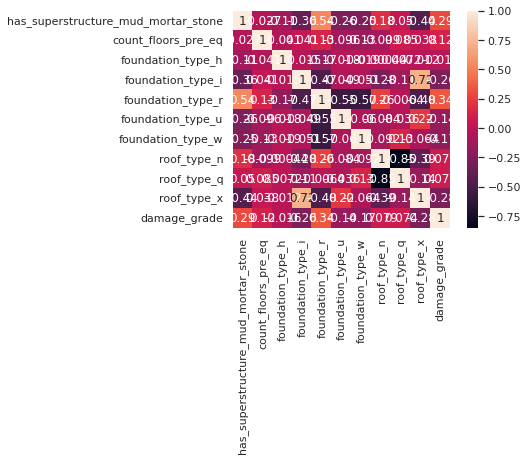

In [ ]:
sns.set()
sns.heatmap(df_train_values_neosubset.join(df_train_labels.damage_grade).corr(), square=True, annot=True)

## Data Pre-processing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_values_subset, df_train_labels.damage_grade,
                                                random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_neotrain, X_neotest, y_neotrain, y_neotest = train_test_split(df_train_values_neosubset, df_train_labels.damage_grade,
                                                random_state=1)

# Modeling


**Basics.**

1. Use NaiveBayes
2. Use knn or Decision Trees (Cross-validation)
3. Use Ensembles with hyperparameters optimization

##**NaiveBayes**

**TEMPLATE DATA**

In [ ]:
from sklearn.naive_bayes import ComplementNB # 1. choose model class
model = ComplementNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_model, average='micro')

0.371859219351967

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model, labels=model.classes_))

              precision    recall  f1-score   support

           1       0.25      0.64      0.36      6238
           2       0.64      0.09      0.15     37210
           3       0.39      0.78      0.52     21703

    accuracy                           0.37     65151
   macro avg       0.42      0.50      0.34     65151
weighted avg       0.52      0.37      0.29     65151



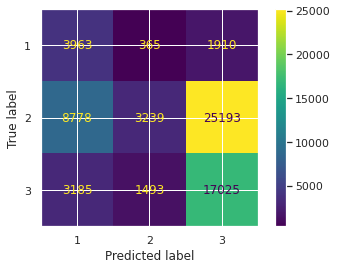

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_model, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

**OUR DATA**






In [ ]:
from sklearn.naive_bayes import MultinomialNB # 1. choose model class
model = MultinomialNB()                       # 2. instantiate model
model.fit(X_neotrain, y_neotrain)                  # 3. fit model to data
y_neomodel = model.predict(X_neotest) 

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_neotest, y_neomodel, average='micro')

0.5744501235591165

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_neotest, y_neomodel, labels=model.classes_))

              precision    recall  f1-score   support

           1       0.52      0.30      0.38      6238
           2       0.58      0.96      0.72     37210
           3       0.20      0.00      0.00     21703

    accuracy                           0.57     65151
   macro avg       0.43      0.42      0.37     65151
weighted avg       0.45      0.57      0.45     65151



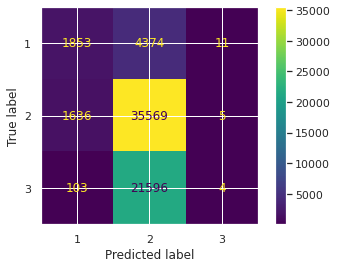

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_neotest, y_neomodel, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

##**Knn**

**TEMPLATE DATA**

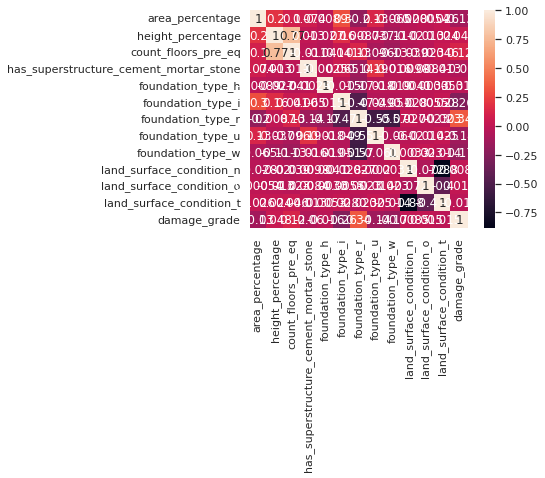

In [ ]:
sns.set()
sns.heatmap(df_train_values_subset.join(df_train_labels.damage_grade).corr(), square=True, annot=True)

In [ ]:
subset = df_train_values_subset.join(df_train_labels.damage_grade)

features = subset[['count_floors_pre_eq', 'foundation_type_i', 'foundation_type_r', 'damage_grade']]
trainKNN, testKNN = train_test_split(features[['count_floors_pre_eq','foundation_type_i', 'foundation_type_r', 'damage_grade']], test_size=0.4)
trainKNN.reset_index(drop = True, inplace = True)

Min Value uniform : 0.4432975185469429 (26)
Min Value distance : 0.44271552826809935 (20)


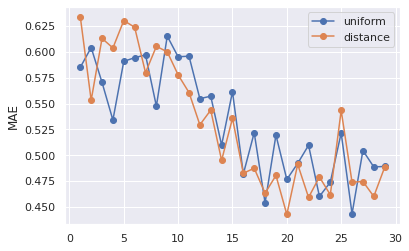

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = True)


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(trainKNN):
          # División train test aleatoria
          f_train = trainKNN.loc[train_fold]
          f_test = trainKNN.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['damage_grade'], axis=1), 
                               y = f_train['damage_grade'])
          y_pred = knn.predict(X = f_test.drop(['damage_grade'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['damage_grade'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
# constructor
n_neighbors = 20
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = trainKNN.drop(['damage_grade'], axis=1), y = trainKNN['damage_grade'])
y_predKNN = knn.predict(X = testKNN.drop(['damage_grade'], axis = 1))
mae = mean_absolute_error(testKNN['damage_grade'], y_predKNN)
print ('MAE', mae)

MAE 0.42785468289828377


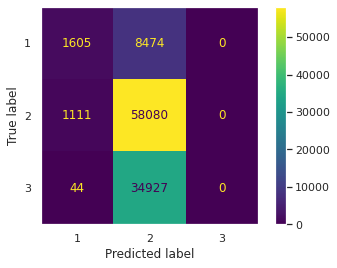

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testKNN['damage_grade'], y_predKNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid(False)
disp.figure_.savefig("confussion_matrix.pdf")
plt.show()

**OUR DATA**

In [ ]:
neosubset = df_train_values_neosubset.join(df_train_labels.damage_grade)

neofeatures = neosubset[['count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'foundation_type_r', 'damage_grade']]
neotrainKNN, neotestKNN = train_test_split(neofeatures[['count_floors_pre_eq','has_superstructure_mud_mortar_stone', 'foundation_type_r', 'damage_grade']], test_size=0.4)
neotrainKNN.reset_index(drop = True, inplace = True)

Min Value uniform : 0.4509529291378869 (29)
Min Value distance : 0.44959708365310824 (29)


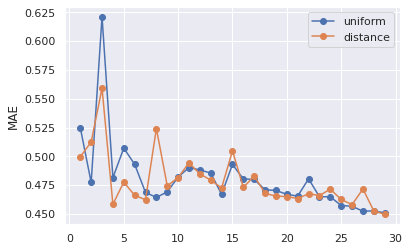

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = True)


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(neotrainKNN):
          # División train test aleatoria
          f_train = neotrainKNN.loc[train_fold]
          f_test = neotrainKNN.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['damage_grade'], axis=1), 
                               y = f_train['damage_grade'])
          y_predneoKNN = knn.predict(X = f_test.drop(['damage_grade'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['damage_grade'], y_predneoKNN)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
# constructor
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
n_neighbors = 29
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 

# fit and predict
knn.fit( X = X_neotrain, y = y_neotrain)
y_predKNN = knn.predict(X = X_neotest)
mae = mean_absolute_error(y_neotest, y_predKNN)
print ('MAE', mae)

MAE 0.44326257463431107


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_neotest, y_predKNN, average='micro')

0.5634756181793066

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_neotest, y_predKNN, labels=model.classes_))

              precision    recall  f1-score   support

           1       0.50      0.24      0.32      6238
           2       0.58      0.89      0.70     37210
           3       0.41      0.10      0.16     21703

    accuracy                           0.56     65151
   macro avg       0.50      0.41      0.40     65151
weighted avg       0.52      0.56      0.49     65151



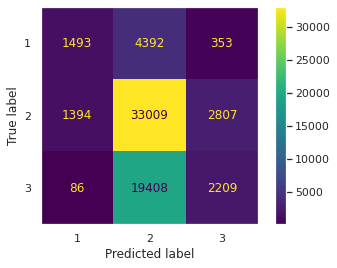

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_neotest, y_predKNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid(False)
disp.figure_.savefig("confussion_matrix.pdf")
plt.show()

##**Decision Tree**

**TEMPLATE DATA**

damage_grade
1     25124
2    148259
3     87218
dtype: int64


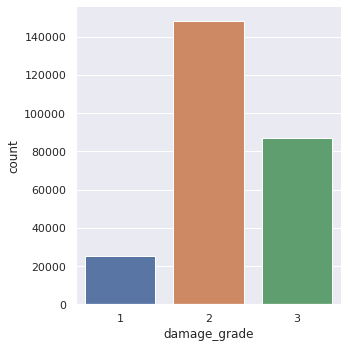

In [ ]:
import seaborn as sb
sb.set(style='darkgrid')

print(df_train_values_subset.join(df_train_labels.damage_grade).groupby('damage_grade').size())
   
sb.catplot(x='damage_grade', data=df_train_values_subset.join(df_train_labels.damage_grade), kind='count')

The annotated lines have no relevance in the histogram.

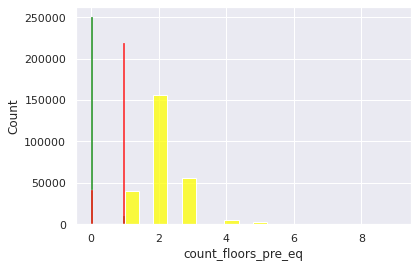

In [ ]:
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['area_percentage'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['height_percentage'])
sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['count_floors_pre_eq'], color = "yellow")
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['has_superstructure_cement_mortar_stone'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['foundation_type_h'])
sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['foundation_type_i'], color = "green")
sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['foundation_type_r'], color = "red")
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['foundation_type_u'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['foundation_type_w'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['land_surface_condition_n'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['land_surface_condition_o'])
#sb.histplot(df_train_values_subset.join(df_train_labels.damage_grade)['land_surface_condition_t'])

In [ ]:
df_damage = subset[['count_floors_pre_eq', 'foundation_type_i', 'foundation_type_r', 'damage_grade']]
trainTree, testTree = train_test_split(df_damage[['count_floors_pre_eq','foundation_type_i', 'foundation_type_r', 'damage_grade']], test_size=0.4)
trainTree.reset_index(drop = True, inplace = True)
df_damage.head()

,count_floors_pre_eq,foundation_type_i,foundation_type_r,damage_grade
building_id,,,,
802906,2,0,1,3
28830,2,0,1,2
94947,2,0,1,3
590882,2,0,1,2
201944,3,0,1,3


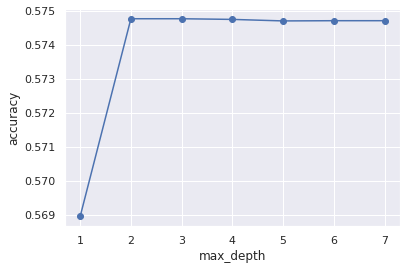

In [ ]:
from sklearn import tree
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False)
accuracies = list()
max_attributes = len(list(df_damage))
depth_range = range(1, max_attributes * 2)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                             min_samples_split = 65, 
                                             min_samples_leaf = 20,
                                             max_depth = depth,
                                            )
    for train_fold, test_fold in cv.split(trainTree):
        f_train = trainTree.loc[train_fold]
        f_test = trainTree.loc[test_fold]
        
        model = tree_model.fit( X = f_train.drop(['damage_grade'], axis=1), 
                               y = f_train['damage_grade'])
        test_acc = model.score(X = f_test.drop(['damage_grade'], axis=1), 
                                y = f_test['damage_grade'])
        fold_accuracy.append(test_acc)
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
import matplotlib.pyplot as plt    
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [ ]:
p_train = 0.574

train = trainTree[:int((len(trainTree))*p_train)]
test = testTree[int((len(testTree))*p_train):]

print("train: ", len(train))
print("tests: ", len(test))


features = ['count_floors_pre_eq', 'foundation_type_i', 'foundation_type_r']
x_train = train[features]
y_train = train['damage_grade']

x_test = test[features]

train:  89750
tests:  44407


In [ ]:
#Constructor/Parametrization
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = 65, 
                                  min_samples_leaf = 20, max_depth = 4)
# fit: training the model
clf.fit(x_train, y_train) # Construcción del modelo

# prediction/test
preds = clf.predict(x_test) 

In [ ]:
from sklearn.metrics import classification_report
print("Metrics \n" 
      +classification_report(y_true=test['damage_grade'], y_pred=preds))

# Confussion Matrix
print("Confussion Matrix:\n")
matriz = pd.crosstab(test['damage_grade'], preds, rownames=['actual'], colnames=['preds'])
print(matriz)

print(pd.DataFrame({'Feature': features ,
              'Importance': clf.feature_importances_}),"\n")

Metrics 
              precision    recall  f1-score   support

           1       0.57      0.25      0.34      4272
           2       0.58      0.97      0.73     25401
           3       0.00      0.00      0.00     14734

    accuracy                           0.58     44407
   macro avg       0.38      0.41      0.36     44407
weighted avg       0.39      0.58      0.45     44407

Confussion Matrix:

preds      1      2
actual             
1       1049   3223
2        753  24648
3         34  14700
                               Feature  Importance
0                  count_floors_pre_eq    0.158785
1  has_superstructure_mud_mortar_stone    0.082801
2                    foundation_type_r    0.758414 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


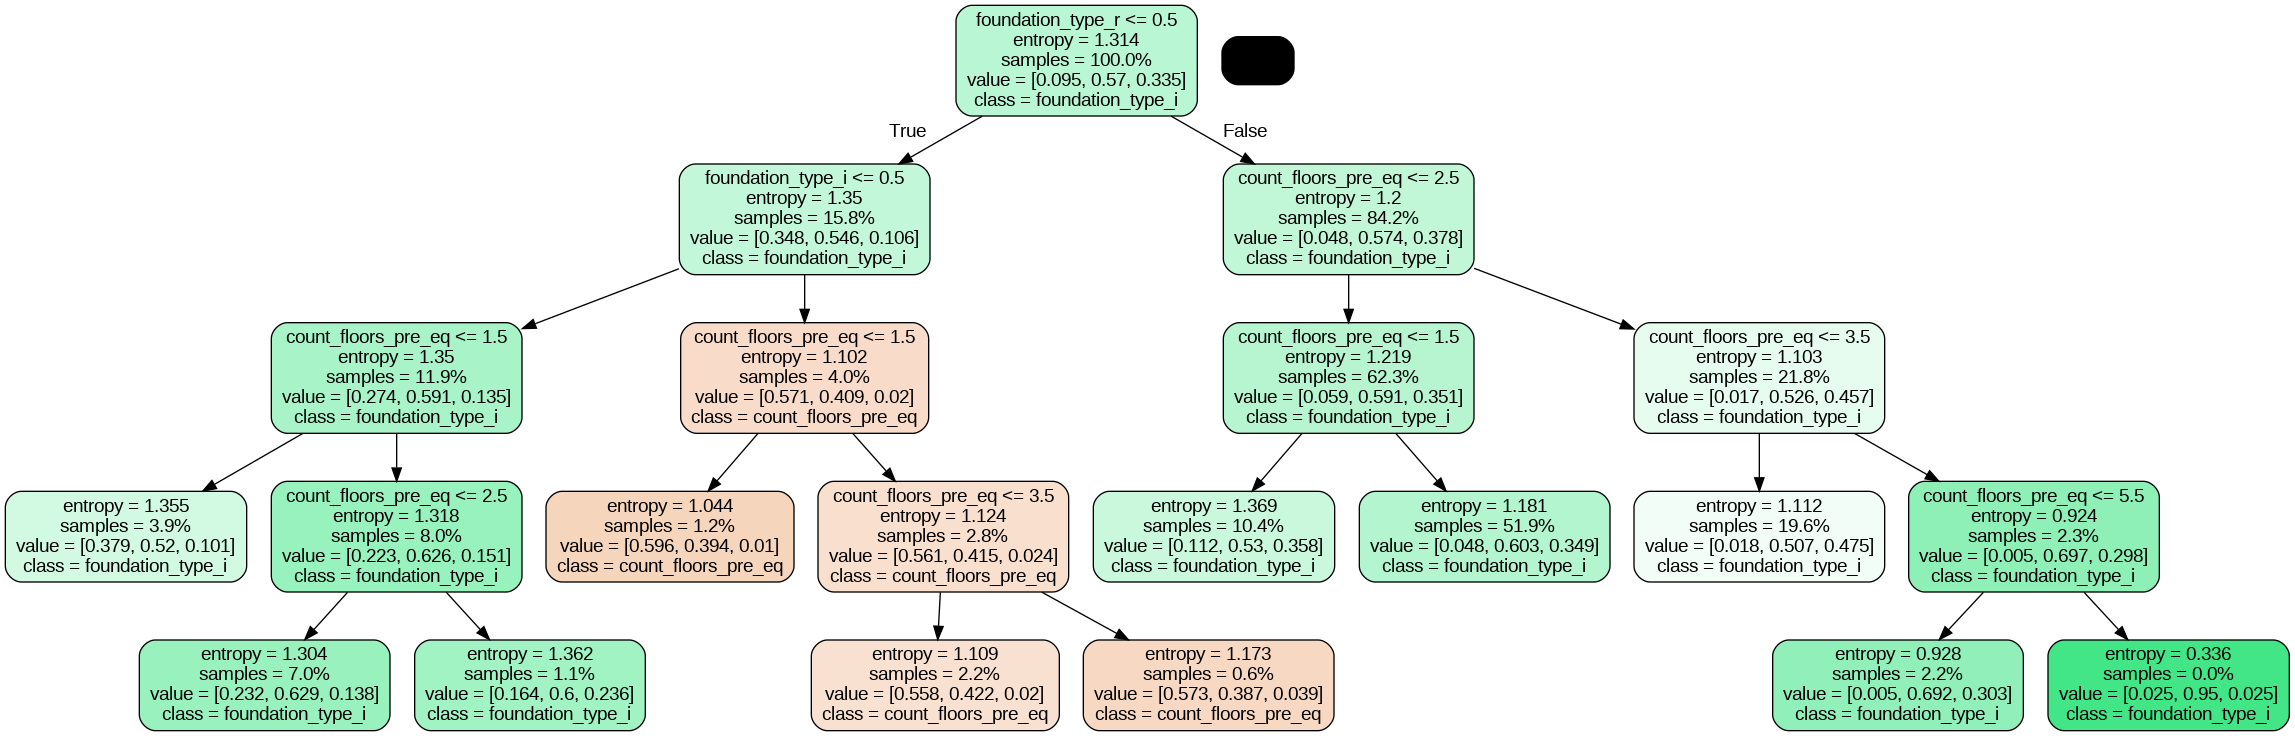

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, proportion = True,
                     feature_names=list(df_damage.drop(['damage_grade'], axis=1)), 
                     class_names = ['count_floors_pre_eq', 'foundation_type_i', 'foundation_type_r'], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

**OUR DATA**

damage_grade
1     25124
2    148259
3     87218
dtype: int64


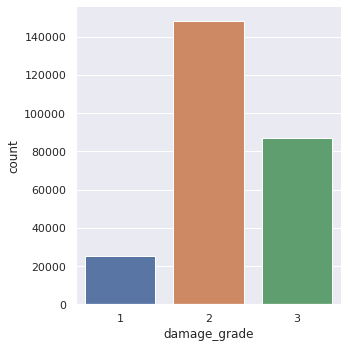

In [ ]:
import seaborn as sb
sb.set(style='darkgrid')

print(df_train_values_neosubset.join(df_train_labels.damage_grade).groupby('damage_grade').size())
   
sb.catplot(x='damage_grade', data=df_train_values_neosubset.join(df_train_labels.damage_grade), kind='count')

The annotated lines have no relevance in the histogram.

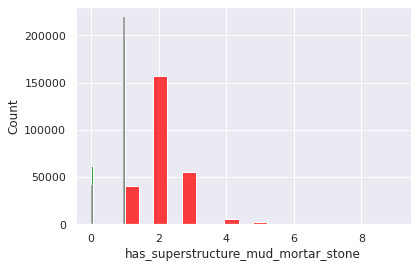

In [ ]:
sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['has_superstructure_mud_mortar_stone'], color = "green")
sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['count_floors_pre_eq'], color = "red")
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['foundation_type_h'])
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['foundation_type_i'])
sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['foundation_type_r'], color = "grey")
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['foundation_type_u'])
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['foundation_type_w'])
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['roof_type_n'])
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['roof_type_q'])
#sb.histplot(df_train_values_neosubset.join(df_train_labels.damage_grade)['roof_type_x'])

In [ ]:
df_neodamage = df_train_values_neosubset.join(df_train_labels.damage_grade)[['count_floors_pre_eq', "has_superstructure_mud_mortar_stone", 'foundation_type_r' ,'damage_grade']]
neotrainTree, neotestTree = train_test_split(df_neodamage[['count_floors_pre_eq',"has_superstructure_mud_mortar_stone", 'foundation_type_r', 'damage_grade']], test_size=0.4)
neotrainTree.reset_index(drop = True, inplace = True)
df_neodamage.head()

,count_floors_pre_eq,has_superstructure_mud_mortar_stone,foundation_type_r,damage_grade
building_id,,,,
802906,2,1,1,3
28830,2,1,1,2
94947,2,1,1,3
590882,2,1,1,2
201944,3,0,1,3


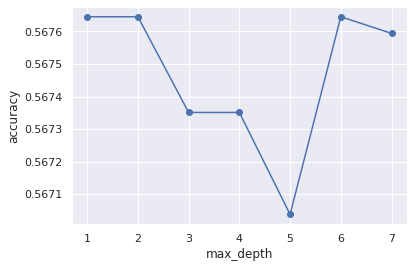

In [ ]:
from sklearn import tree
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False)
accuracies = list()
max_attributes = len(list(df_neodamage))
depth_range = range(1, max_attributes * 2)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                             min_samples_split = 65, 
                                             min_samples_leaf = 20,
                                             max_depth = depth,
                                            )
    for train_fold, test_fold in cv.split(neotrainTree):
        f_train = neotrainTree.loc[train_fold]
        f_test = neotrainTree.loc[test_fold]
        
        model = tree_model.fit( X = f_train.drop(['damage_grade'], axis=1), 
                               y = f_train['damage_grade'])
        test_acc = model.score(X = f_test.drop(['damage_grade'], axis=1), 
                                y = f_test['damage_grade'])
        fold_accuracy.append(test_acc)
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
import matplotlib.pyplot as plt    
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [ ]:
p_train = 0.5678

neotrain = neotrainTree[:int((len(neotrainTree))*p_train)]
neotest = neotestTree[int((len(neotestTree))*p_train):]

print("train: ", len(neotrain))
print("tests: ", len(neotest))


features = ['count_floors_pre_eq', "has_superstructure_mud_mortar_stone", 'foundation_type_r']
x_neotrain = neotrain[features]
y_neotrain = neotrain['damage_grade']

x_neotest = neotest[features]

train:  88781
tests:  45053


In [ ]:
#Constructor/Parametrization
neoclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = 65, 
                                  min_samples_leaf = 20, max_depth = 6)
# fit: training the model
neoclf.fit(x_neotrain, y_neotrain) # Construcción del modelo

# prediction/test
neopreds = neoclf.predict(x_neotest) 

In [ ]:
from sklearn.metrics import classification_report
print("Metrics \n" 
      +classification_report(y_true=neotest['damage_grade'], y_pred=neopreds))

# Confussion Matrix
print("Confussion Matrix:\n")
matriz = pd.crosstab(neotest['damage_grade'], neopreds, rownames=['actual'], colnames=['preds'])
print(matriz)

print(pd.DataFrame({'Feature': features ,
              'Importance': neoclf.feature_importances_}),"\n")

Metrics 
              precision    recall  f1-score   support

           1       0.46      0.03      0.05      4359
           2       0.57      0.99      0.73     25689
           3       0.00      0.00      0.00     15005

    accuracy                           0.57     45053
   macro avg       0.34      0.34      0.26     45053
weighted avg       0.37      0.57      0.42     45053

Confussion Matrix:

preds     1      2
actual            
1       122   4237
2       129  25560
3        14  14991
                               Feature  Importance
0                  count_floors_pre_eq    0.136365
1  has_superstructure_mud_mortar_stone    0.161703
2                    foundation_type_r    0.701932 



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


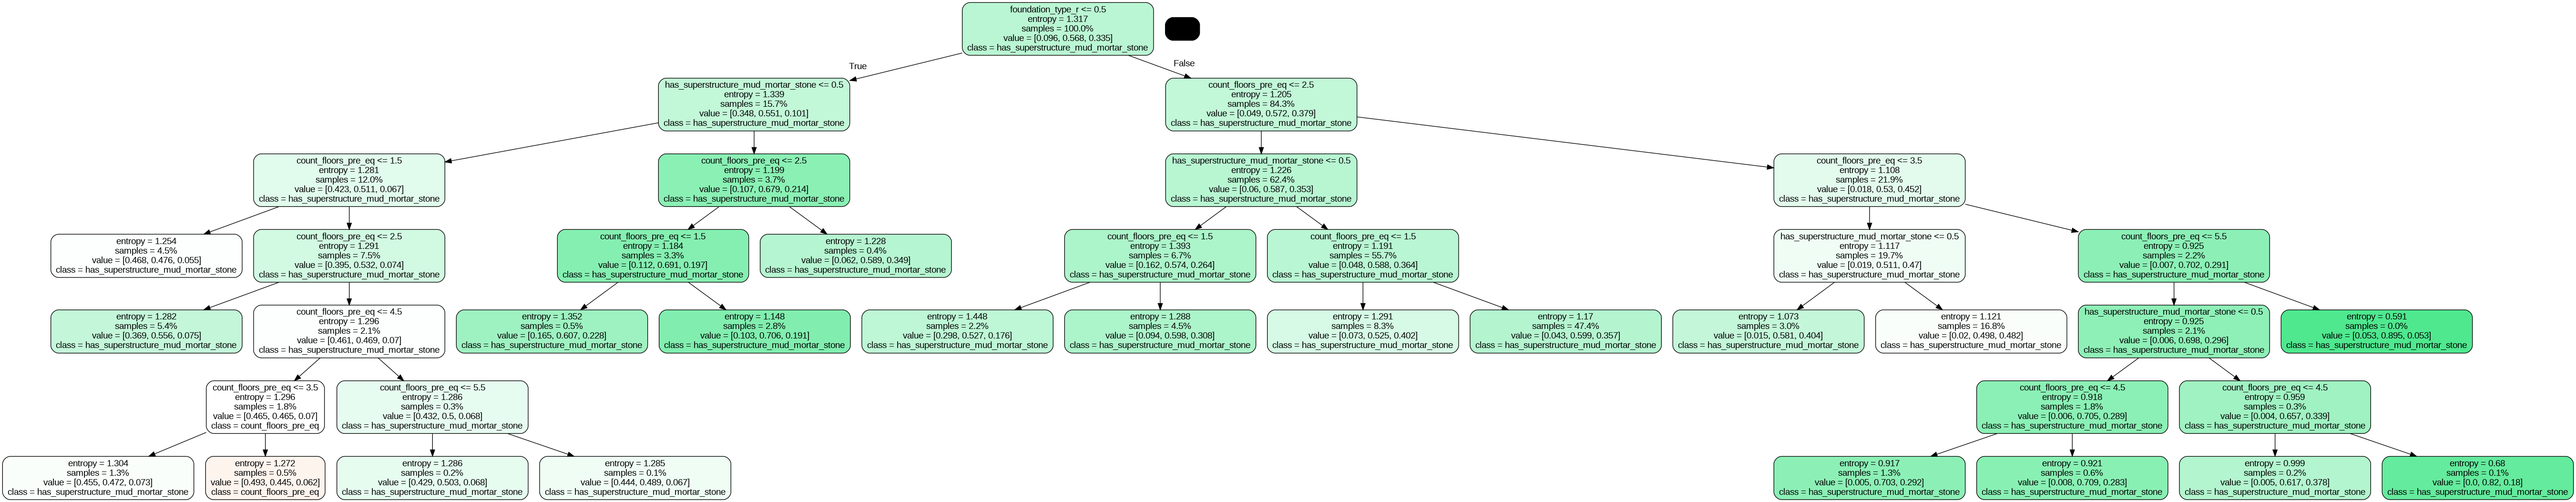

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()
tree.export_graphviz(neoclf, out_file = dot_data, proportion = True,
                     feature_names=list(df_neodamage.drop(['damage_grade'], axis=1)), 
                     class_names = ['count_floors_pre_eq', "has_superstructure_mud_mortar_stone", 'foundation_type_r'], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

##**Random forest and hyperparameters**

**TEMPLATE DATA**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressorForest = RandomForestRegressor(n_estimators= 4, max_depth = 2, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressorForest.fit(X_train, y_train)

# Test
y_predForest = regressorForest.predict(X_test)

# metrics calculation 
mae = mean_absolute_error(y_test, y_predForest)
print ('MAE', mae)

MAE 0.4232206719774063


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


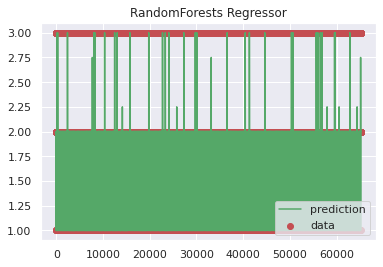

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_neotest)))
plt.scatter(xx, y_neotest, c='r', label='data')
plt.plot(xx, y_predForest, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

**OUR DATA**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
neoregressorForest = RandomForestRegressor(n_estimators= 4, max_depth = 2, criterion='absolute_error', random_state=0)
#1.2 Model construction
neoregressorForest.fit(X_neotrain, y_neotrain)

# Test
y_predneoForest = neoregressorForest.predict(X_neotest)

# metrics calculation 
from sklearn.metrics import f1_score
f1_score(y_neotest, y_predneoForest, average='micro')

0.5779189881966509

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


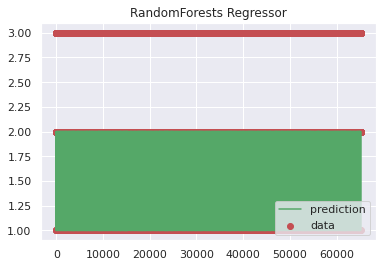

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_neotest)))
plt.scatter(xx, y_neotest, c='r', label='data')
plt.plot(xx, y_predneoForest, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
regressorForest = RandomForestRegressor() 
regressorForest

RandomForestRegressor()

In [ ]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12, 8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_eror", "absolute_error"]}

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressorForest, param_distributions = param_dist, 
                               n_iter = 2, cv = 2, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = neotrainTree.drop(['damage_grade'], axis=1), 
                           y = neotrainTree['damage_grade'])

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_eror',
                                                      'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbfff8a41f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbfff7ed910>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

In [ ]:
rnd_regres.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 8}

In [ ]:
# choose the best

best_random = rnd_regres
# fit and predict
best_random.fit( X = neotrainTree.drop(['damage_grade'], axis=1), y = neotrainTree['damage_grade'])
neohyper_y_pred = best_random.predict(X = neotestTree.drop(['damage_grade'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(neotestTree['damage_grade'], neohyper_y_pred)
print ('MAE', mae)

MAE 0.4307374257729684


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


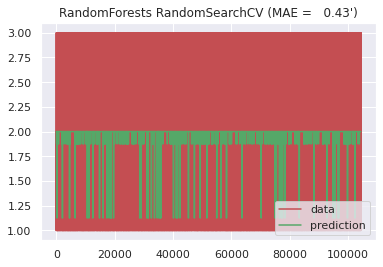

In [ ]:
from sklearn.metrics import mean_absolute_error

# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(neotestTree['damage_grade'].shape[0]))
plt.plot(xx, neotestTree['damage_grade'], c='r', label='data')
plt.plot(xx, neohyper_y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

**Extensions:**

4. Repeat the process with different techniques with improvements in the feature selection/engineering step, or techniques to deal with the imbalanced nature of the categories.

##**Boosting**

**TEMPLATE DATA**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

rng = np.random.RandomState(1)
# Fit regression model
boosting = []
boosting.append(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'))
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#
boosting.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'),
                          n_estimators=5, random_state=rng))
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py                         
boosting.append(GradientBoostingRegressor(n_estimators=5, learning_rate=0.1,
                                   max_depth=4, random_state=0, loss='squared_error'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


Error Measure 0.4225568295191171


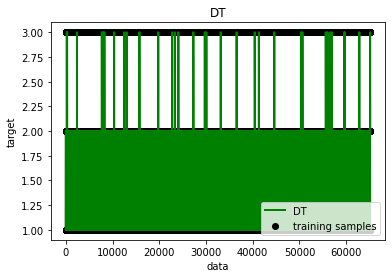

Error Measure 0.42376939724639684


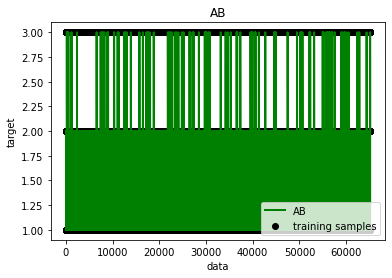

Error Measure 0.48938669101968474


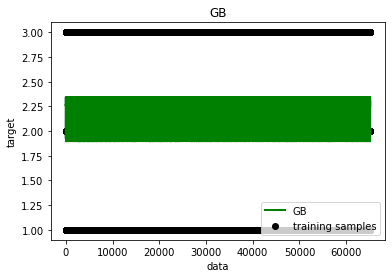

In [ ]:
from sklearn.metrics import mean_absolute_error
xx = np.stack(i for i in range(len(y_test)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(boosting):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()

**OUR DATA**






In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

rng = np.random.RandomState(1)
# Fit regression model
neoboosting = []
boosting.append(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'))
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#
neoboosting.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'),
                          n_estimators=5, random_state=rng))
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py                         
neoboosting.append(GradientBoostingRegressor(n_estimators=5, learning_rate=0.1,
                                   max_depth=4, random_state=0, loss='squared_error'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


Error Measure 0.4225721784776903


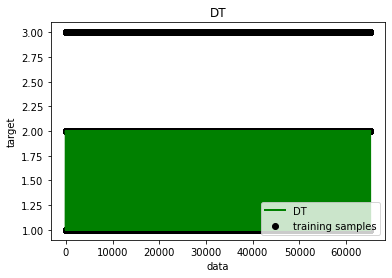

Error Measure 0.42591825144663936


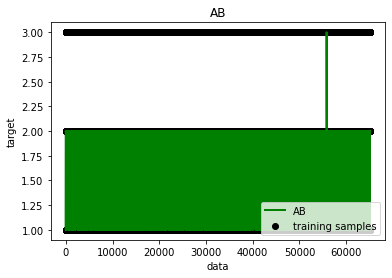

Error Measure 0.4868655969214526


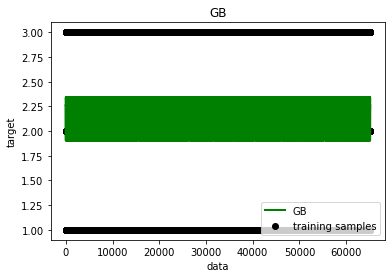

In [ ]:
from sklearn.metrics import mean_absolute_error
xx = np.stack(i for i in range(len(y_neotest)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(boosting):
    r.fit(X_neotrain, y_neotrain)
    neoy = r.predict(X_neotest)
    print ("Error Measure", mean_absolute_error(y_neotest,neoy))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_neotest, c="k", label="training samples")
    plt.plot(xx, neoy, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()

# Prepare Submission

For the **final** $F1-micro-average$, we'll be using the class predictions, not the class probabilities. 

Let's load up the data, select the subset of features we used to train the model and create dummy variables, and see what we get on the leaderboard.

In [ ]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values_subset = test_values[neo_selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

--2022-12-12 23:46:12--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/test_values.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv [following]
--2022-12-12 23:46:12--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/test_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7815385 (7.5M) [text/plain]
Saving to: ‘test_values.csv’

test_values.csv     100%[===================>]   7.45M  --.-KB/s    in 0.06s   

2022-12-12 23:46:12 (117 MB/s) - ‘test_values.csv’ saved [7815385/78153

**Make Predictions**: Note that we use the class predictions, not the class probabilities.

In [ ]:
predictions = model.predict(test_values_subset)

**Save Submission**

We can use the column name and index from the submission format to ensure our predictions are in the form.

In [ ]:
!wget https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

--2022-12-12 23:46:18--  https://github.com/alan-flint/Richter-DrivenData/raw/master/input/submission_format.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv [following]
--2022-12-12 23:46:18--  https://raw.githubusercontent.com/alan-flint/Richter-DrivenData/master/input/submission_format.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 777012 (759K) [text/plain]
Saving to: ‘submission_format.csv’

submission_format.c 100%[===================>] 758.80K  --.-KB/s    in 0.005s  

2022-12-12 23:46:19 (143 MB/s) - ‘submission_for

,damage_grade
building_id,
300051,2
99355,2
890251,2
745817,2
421793,2


In [ ]:
my_submission.to_csv('submission.csv')